## 01/ Preprocessing

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Enable inline plotting in the notebook
%matplotlib inline

In [8]:
# Read the XLSX file
data_2010 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2009-2010")
data_2011 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2010-2011")

In [9]:
datas = [data_2010, data_2011]
data = pd.concat(datas, keys = ['09-10', '10-11'])
data

Invoice StockCode                          Description  Quantity  \
09-10 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1       489434    79323P                   PINK CHERRY LIGHTS        12   
      2       489434    79323W                  WHITE CHERRY LIGHTS        12   
      3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...              ...       ...                                  ...       ...   
10-11 541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
      541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
      541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
      541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
      541909  581587      POST                              POSTAGE         1   

                     InvoiceDate  Price  Customer ID         Country  
09-10 0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
      1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
      4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                          ...    ...          ...             ...  
10-11 541905 2011-12-09 12:50:00   2.10      12680.0          France  
      541906 2011-12-09 12:50:00   4.15      12680.0          France  
      541907 2011-12-09 12:50:00   4.15      12680.0          France  
      541908 2011-12-09 12:50:00   4.95      12680.0          France  
      541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

### Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal. The name of the country where a customer resides.

In [10]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(data, title="Profiling Report")

# Save the report as an HTML file
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.rename(index = str, \
              columns = {'Invoice' : 'invoice', \
                         'StockCode' : 'stock_code', \
                         'Quantity' : 'quantity', \
                         'InvoiceDate' : 'invoice_date', \
                         'Price' : 'unit_price', \
                         'Country' : 'country', \
                         'Description' : 'description', \
                         'Customer ID' : 'customer_id'}, inplace = True)
data

invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price  customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95      13085.0   
      1             12 2009-12-01 07:45:00        6.75      13085.0   
      2             12 2009-12-01 07:45:00        6.75      13085.0   
      3             48 2009-12-01 07:45:00        2.10      13085.0   
      4             24 2009-12-01 07:45:00        1.25      13085.0   
...                ...                 ...         ...          ...   
10-11 541905         6 2011-12-09 12:50:00        2.10      12680.0   
      541906         4 2011-12-09 12:50:00        4.15      12680.0   
      541907         4 2011-12-09 12:50:00        4.15      12680.0   
      541908         3 2011-12-09 12:50:00        4.95      12680.0   
      541909         1 2011-12-09 12:50:00       18.00      12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[1067371 rows x 8 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067371 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 90.5+ MB


In [13]:
# change type of customer_id from float to string
data['customer_id']=data['customer_id'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067371 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   1067371 non-null  object        
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 90.5+ MB


In [14]:
# Check the statistical information for data for null values:
data.isnull().sum().sort_values(ascending = False)

description     4382
invoice            0
stock_code         0
quantity           0
invoice_date       0
unit_price         0
customer_id        0
country            0
dtype: int64

In [15]:
data.describe()

,quantity,unit_price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [16]:
# Calculate how many negative values of unit_price are present in retail. If they are only a small percentage of the total number of instances, then remove them from retail:
(data['unit_price'] <= 0).sum()

6207

In [17]:
# Similarly, find out the number of negative values of quantity:
(data['quantity'] <= 0).sum()

22950

In [18]:
# Display the total number of negative instances for the unit_price and quantity columns:
data[(data['unit_price'] <= 0) & (data['quantity'] <= 0) \
       & (data['customer_id'].isnull())]

,,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [19]:
data[(data['quantity'] <= 0) ]

invoice stock_code                       description  quantity  \
09-10 178     C489449      22087          PAPER BUNTING WHITE LACE       -12   
      179     C489449     85206A      CREAM FELT EASTER EGG BASKET        -6   
      180     C489449      21895     POTTING SHED SOW 'N' GROW SET        -4   
      181     C489449      21896                POTTING SHED TWINE        -6   
      182     C489449      22083        PAPER CHAIN KIT RETRO SPOT       -12   
...               ...        ...                               ...       ...   
10-11 540449  C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
      541541  C581499          M                            Manual        -1   
      541715  C581568      21258        VICTORIAN SEWING BOX LARGE        -5   
      541716  C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
      541717  C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   

                    invoice_date  unit_price customer_id         country  
09-10 178    2009-12-01 10:33:00        2.95     16321.0       Australia  
      179    2009-12-01 10:33:00        1.65     16321.0       Australia  
      180    2009-12-01 10:33:00        4.25     16321.0       Australia  
      181    2009-12-01 10:33:00        2.10     16321.0       Australia  
      182    2009-12-01 10:33:00        2.95     16321.0       Australia  
...                          ...         ...         ...             ...  
10-11 540449 2011-12-09 09:57:00        0.83     14397.0  United Kingdom  
      541541 2011-12-09 10:28:00      224.69     15498.0  United Kingdom  
      541715 2011-12-09 11:57:00       10.95     15311.0  United Kingdom  
      541716 2011-12-09 11:58:00        1.25     17315.0  United Kingdom  
      541717 2011-12-09 11:58:00        1.25     17315.0  United Kingdom  

[22950 rows x 8 columns]

In [20]:
data[(data['unit_price'] < 0) ]

invoice stock_code      description  quantity  \
09-10 179403  A506401          B  Adjust bad debt         1   
      276274  A516228          B  Adjust bad debt         1   
      403472  A528059          B  Adjust bad debt         1   
10-11 299983  A563186          B  Adjust bad debt         1   
      299984  A563187          B  Adjust bad debt         1   

                    invoice_date  unit_price customer_id         country  
09-10 179403 2010-04-29 13:36:00   -53594.36         nan  United Kingdom  
      276274 2010-07-19 11:24:00   -44031.79         nan  United Kingdom  
      403472 2010-10-20 12:04:00   -38925.87         nan  United Kingdom  
10-11 299983 2011-08-12 14:51:00   -11062.06         nan  United Kingdom  
      299984 2011-08-12 14:52:00   -11062.06         nan  United Kingdom

In [21]:
# Store the instances with missing values in another DataFrame:
null_data = data[data.isnull().any(axis=1)]
null_data

invoice stock_code description  quantity        invoice_date  \
09-10 470     489521      21646         NaN       -50 2009-12-01 11:44:00   
      3114    489655      20683         NaN       -44 2009-12-01 17:26:00   
      3161    489659      21350         NaN       230 2009-12-01 17:39:00   
      3731    489781      84292         NaN        17 2009-12-02 11:45:00   
      4296    489806      18010         NaN      -770 2009-12-02 12:42:00   
...              ...        ...         ...       ...                 ...   
10-11 535322  581199      84581         NaN        -2 2011-12-07 18:26:00   
      535326  581203      23406         NaN        15 2011-12-07 18:31:00   
      535332  581209      21620         NaN         6 2011-12-07 18:35:00   
      536981  581234      72817         NaN        27 2011-12-08 10:33:00   
      538554  581408      85175         NaN        20 2011-12-08 14:06:00   

              unit_price customer_id         country  
09-10 470            0.0         nan  United Kingdom  
      3114           0.0         nan  United Kingdom  
      3161           0.0         nan  United Kingdom  
      3731           0.0         nan  United Kingdom  
      4296           0.0         nan  United Kingdom  
...                  ...         ...             ...  
10-11 535322         0.0         nan  United Kingdom  
      535326         0.0         nan  United Kingdom  
      535332         0.0         nan  United Kingdom  
      536981         0.0         nan  United Kingdom  
      538554         0.0         nan  United Kingdom  

[4382 rows x 8 columns]

In [22]:
# # Delete the instances with missing values from retail:
# new_data = data[(data['unit_price'] > 0) \
#                     & (data['quantity'] > 0)]
# new_data.describe()

In [23]:
# Drop rows with NaN values in the customer_id column
del_data = data.dropna(subset=['customer_id'])
del_data

invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95     13085.0   
      1             12 2009-12-01 07:45:00        6.75     13085.0   
      2             12 2009-12-01 07:45:00        6.75     13085.0   
      3             48 2009-12-01 07:45:00        2.10     13085.0   
      4             24 2009-12-01 07:45:00        1.25     13085.0   
...                ...                 ...         ...         ...   
10-11 541905         6 2011-12-09 12:50:00        2.10     12680.0   
      541906         4 2011-12-09 12:50:00        4.15     12680.0   
      541907         4 2011-12-09 12:50:00        4.15     12680.0   
      541908         3 2011-12-09 12:50:00        4.95     12680.0   
      541909         1 2011-12-09 12:50:00       18.00     12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[1067371 rows x 8 columns]

In [24]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067371 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   1067371 non-null  object        
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 90.5+ MB


In [25]:
del_data.plot()

<AxesSubplot: >

<AxesSubplot: >

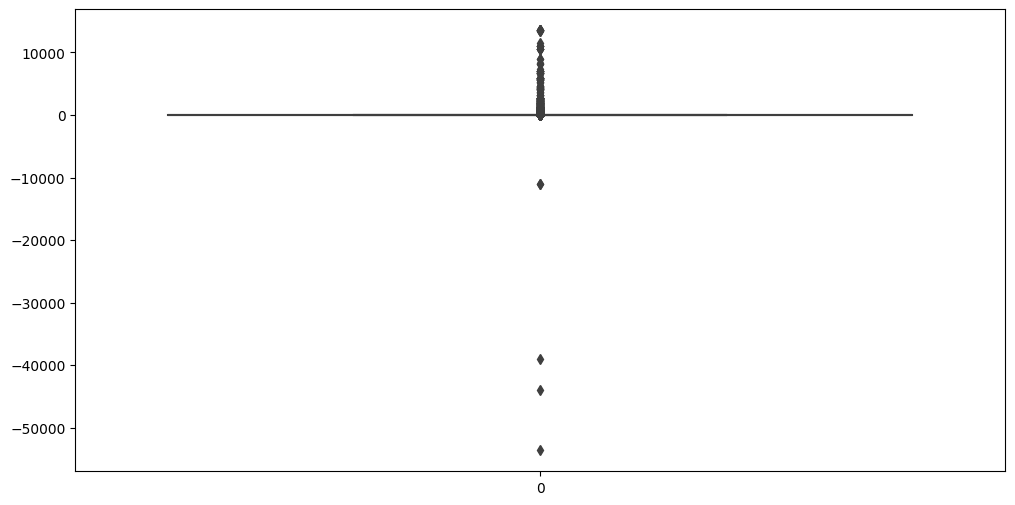

In [46]:
# Plot a boxplot for unit_price to see if there are any outliers. If there are, remove those instances:
plt.subplots(figsize = (12, 6))
sns.boxplot(del_data.unit_price)

In [27]:
# Similarly, plot the unit_price boxplot for the modified values:
del_data = del_data[del_data.unit_price < 15000]
del_data.describe()

,quantity,unit_price
count,1.067364e+06,1.067364e+06
mean,9.938968e+00,4.500190e+00
std,1.727064e+02,1.072778e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,1.354133e+04


In [28]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067364 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067364 non-null  object        
 1   stock_code    1067364 non-null  object        
 2   description   1062982 non-null  object        
 3   quantity      1067364 non-null  int64         
 4   invoice_date  1067364 non-null  datetime64[ns]
 5   unit_price    1067364 non-null  float64       
 6   customer_id   1067364 non-null  object        
 7   country       1067364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 90.5+ MB


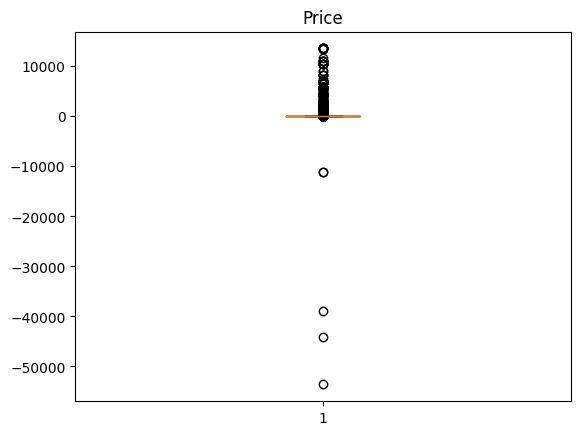

In [45]:

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(del_data.unit_price)

# Set title

ax.set_title('Price')

# Display the plot
plt.show()

In [33]:
# Plot a boxplot for quantity to see if there are any outliers. If there are, remove those instances:
plt.subplots(figsize = (12, 6))
q = sns.boxplot(del_data.quantity)
q

<AxesSubplot: >

In [31]:
# number of unique customers
del_data["customer_id"].nunique()

5942

## 02/ Data Analysis